<a href="https://colab.research.google.com/github/Andrew513/signalReport/blob/main/B0829043_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ThinkDSP

This notebook contains solutions to exercises in Chapter 1: Sounds and Signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

### Exercise 1

Go to http://freesound.org and download a sound sample that
includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is
constant.  Compute and plot the spectrum of the segment you selected.
What connection can you make between the timbre of the sound and the
harmonic structure you see in the spectrum?

Use `high_pass`, `low_pass`, and `band_stop` to
filter out some of the harmonics.  Then convert the spectrum back
to a wave and listen to it.  How does the sound relate to the
changes you made in the spectrum?

### Solution

I chose this recording (or synthesis?) of a trumpet section http://www.freesound.org/people/Dublie/sounds/170255/

As always, thanks to the people who contributed these recordings!

In [ ]:
!wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/328878__tzurkan__guitar-phrase-tzu.wav

--2021-05-01 00:28:21--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/328878__tzurkan__guitar-phrase-tzu.wav
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/328878__tzurkan__guitar-phrase-tzu.wav [following]
--2021-05-01 00:28:21--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/328878__tzurkan__guitar-phrase-tzu.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 362684 (354K) [audio/wav]
Saving to: '328878__tzurkan__guitar-phrase-tzu.wav'

     0K .......... .......... .......... .......... .......... 14% 1.20M 0s
    50K ........

In [ ]:
from thinkdsp import read_wave

wave = read_wave('328878__tzurkan__guitar-phrase-tzu.wav')
wave.normalize()
wave.make_audio()


挑選一個喜歡的吉他聲在ThinkDSP/raw/master/code/中 
(若是網路上找的須注意版權問題，並放入第一行所Get的位置中"thinkdsp.py")

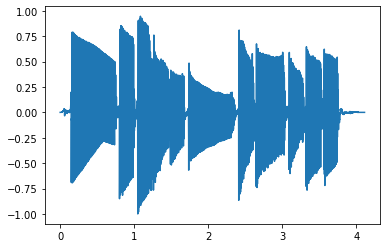

In [ ]:
wave.plot()

觀察上圖plot聲音波型變化為何，並思考如何改變使其更獨特。

In [ ]:
segment = wave.segment(start=0.3, duration=0.48)
segment.make_audio()

這是上圖彈奏的第一個弦音！

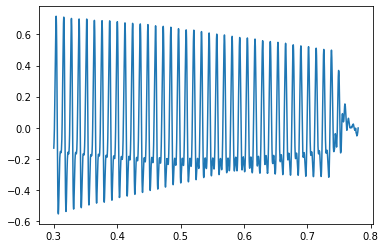

In [ ]:
segment.plot()

取那一段第一個弦音的波型，如上圖所示！

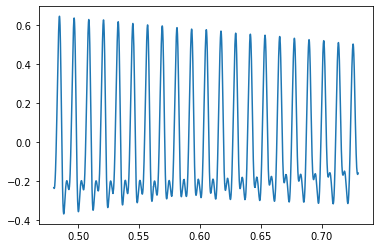

In [ ]:
segment.segment(start=0, duration=0.25).plot()

以下為這段吉他的聲譜，可以看出他屬於低音的部分!

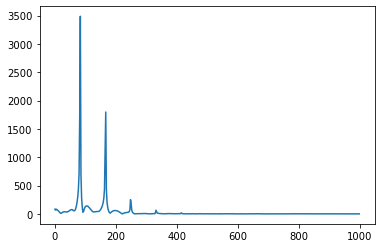

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

去除聲譜極其低弱的後段，觀察主要聲譜型態。

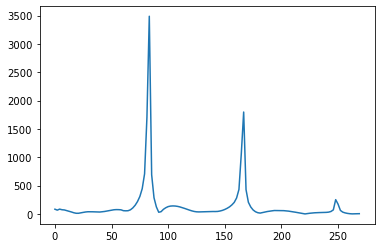

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=270)

`peaks` prints the highest points in the spectrum and their frequencies, in descending order:
搜尋每個聲譜的高峰位於何處，可觀察到密集地出現在三處('主峰為79~83'、'164~166'以及末端尾音的'247~250')

In [ ]:
spectrum.peaks()[:30]

[(3488.596535951237, 83.33333333333334),
 (1798.2730070545997, 166.66666666666669),
 (1705.6842346566211, 81.25),
 (1065.2380166234652, 164.58333333333334),
 (707.8370749095824, 79.16666666666667),
 (691.4037013386139, 85.41666666666667),
 (445.80099909191824, 77.08333333333334),
 (432.3128387701164, 162.5),
 (428.5623785566, 168.75),
 (307.7290892445155, 75.0),
 (284.5710289259063, 87.5),
 (281.35939849088015, 160.41666666666669),
 (252.00822217984108, 247.91666666666669),
 (218.50679840426136, 72.91666666666667),
 (205.42737792023604, 170.83333333333334),
 (203.9390008269198, 158.33333333333334),
 (173.06177548511297, 250.00000000000003),
 (159.26892593413442, 156.25),
 (152.81824856896327, 70.83333333333334),
 (141.3103506351721, 104.16666666666667),
 (139.29464204387483, 106.25000000000001),
 (138.48278975519065, 102.08333333333334),
 (133.23815160739656, 108.33333333333334),
 (129.37458257331866, 100.0),
 (124.90733627058317, 154.16666666666669),
 (123.9690014405641, 89.5833333333

In [ ]:
spectrum.low_pass(100)

And here's what it sounds like:

In [ ]:
spectrum.make_wave()
spectrum.make_audio()
"""播不了，不能make audio"""

AttributeError: 'Spectrum' object has no attribute 'make_audio'

設定不同的filters：def filter_wave(wave, start, duration, cutoff):
可以調節起始段的：segment = wave.segment(start, duration)，
可選擇聲普過濾器的：spectrum.low_pass(cutoff)
並形成聲音

In [ ]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=1000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=1000, color='#045a8d')
    decorate(xlabel=' Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

以下為設定適合此吉他聲的調節器

In [ ]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 4, 0.1), duration=(0, 4, 0.1), cutoff=(0, 400, 25));

interactive(children=(FloatSlider(value=2.0, description='start', max=4.0), FloatSlider(value=2.0, description…

### Exercise 2

Synthesize a compound signal by creating SinSignal and CosSignal
objects and adding them up.  Evaluate the signal to get a Wave,
and listen to it.  Compute its Spectrum and plot it.
What happens if you add frequency
components that are not multiples of the fundamental?

### Solution

這是我一些隨機設定的參數。它產生了一個人工製造音頻。

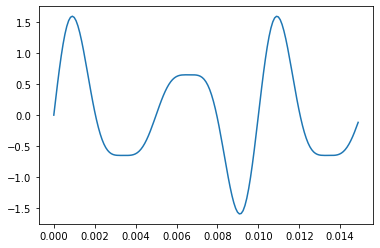

In [ ]:
from thinkdsp import SinSignal

signal = (SinSignal(freq=200, amp=1.0) +
          SinSignal(freq=300, amp=0.5) +
          SinSignal(freq=400, amp=0.25))
signal.plot()

我們可以用這個signal讓他產生波型：(如上圖)
利用信號處理中的變跡(apodize)(是一種光學過濾技術，更精深的使用法還須請教呂教授)

In [ ]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

而將隨機設計的'信號'製造成聲音，聽起來如下。

In [ ]:
wave2.make_audio()

The components are all multiples of 200 Hz, so they make a coherent sounding tone.
這些分量都是200 Hz的倍數，因此它們發出連貫的聲音。(不懂)

音譜如下所示：

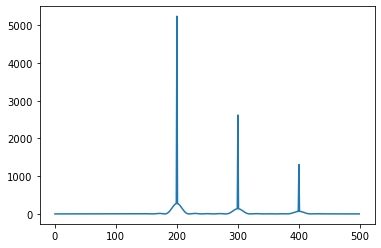

In [ ]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=500)

If we add a component that is not a multiple of 200 Hz, we hear it as a distinct pitch.(不懂)

In [ ]:
signal += SinSignal(freq=800)
signal.make_wave().make_audio()

### Exercise 3

Write a function called `stretch` that takes a Wave and a stretch factor and speeds up or slows down the wave by modifying `ts` and `framerate`.  Hint: it should only take two lines of code.

### Solution

再次使用吉他聲協助我測試。

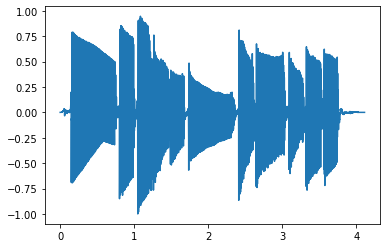

In [ ]:
from thinkdsp import read_wave

wave3 = read_wave('328878__tzurkan__guitar-phrase-tzu.wav')
wave3.normalize()
wave3.make_audio()
wave3.plot()

以下為我stretch的呈現
factor是乘以多少（可能很複雜）
ts = np.arange(len(ys)) / self.framerate 
framerate=frames per second(每秒幀數)

In [ ]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

以下是將其加速2倍時的聲音(2倍=*0.5)。

In [ ]:
stretch(wave3, 0.5)
wave3.make_audio()

以下是改變後的聲音波型圖示。(時間軸確實為兩倍速後的秒數(4秒變為2秒))

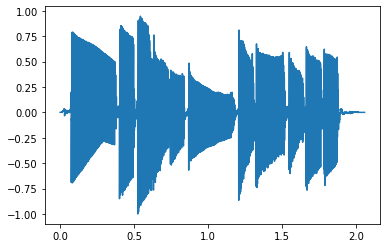

In [ ]:
wave3.plot()